In [ ]:
# check version
import tensorflow as tf
from keras.utils.vis_utils import plot_model
print(tf.__version__)



2.9.2


In [ ]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
print("Available Devices: ", tf.config.list_physical_devices())
tf.test.gpu_device_name()

Num GPUs Available:  1
Available Devices:  [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


'/device:GPU:0'

 **Run your tensorflow run on specific device**

In [ ]:

# tf.debugging.set_log_device_placement(True)

# Place tensors on the CPU
with tf.device('/CPU:0'):
  a = tf.constant([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
  b = tf.constant([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])
  print(b)
# Run on the GPU
c = tf.matmul(a, b)
print(c)
  
# read docs: https://www.tensorflow.org/guide/gpu

tf.Tensor(
[[1. 2.]
 [3. 4.]
 [5. 6.]], shape=(3, 2), dtype=float32)
tf.Tensor(
[[22. 28.]
 [49. 64.]], shape=(2, 2), dtype=float32)


# **Regression Loss Functions**

In [ ]:
# generate regression dataset
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler

X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=1)

# standardize dataset
X = StandardScaler().fit_transform(X)
y = StandardScaler().fit_transform(y.reshape(len(y),1))[:,0]

# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

**DEFINE THE MODEL**

Epoch 1/10
16/16 [==============================] - 0s 12ms/step - loss: 0.1574 - val_loss: 0.1378
Epoch 2/10
16/16 [==============================] - 0s 5ms/step - loss: 0.0845 - val_loss: 0.0585
Epoch 3/10
16/16 [==============================] - 0s 5ms/step - loss: 0.0423 - val_loss: 0.0339
Epoch 4/10
16/16 [==============================] - 0s 6ms/step - loss: 0.0249 - val_loss: 0.0240
Epoch 5/10
16/16 [==============================] - 0s 5ms/step - loss: 0.0167 - val_loss: 0.0204
Epoch 6/10
16/16 [==============================] - 0s 5ms/step - loss: 0.0129 - val_loss: 0.0189
Epoch 7/10
16/16 [==============================] - 0s 5ms/step - loss: 0.0108 - val_loss: 0.0178
Epoch 8/10
16/16 [==============================] - 0s 5ms/step - loss: 0.0097 - val_loss: 0.0165
Epoch 9/10
16/16 [==============================] - 0s 7ms/step - loss: 0.0084 - val_loss: 0.0159
Epoch 10/10
16/16 [==============================] - 0s 5ms/step - loss: 0.0076 - val_loss: 0.0162
Model: "sequential

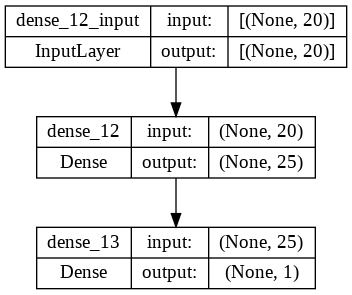

In [ ]:
# example of a model defined with the sequential api
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD



# define model
model = Sequential()
model.add(Dense(25, input_dim=20, activation='relu'))
model.add(Dense(1, activation='linear'))

# The model will be fit with stochastic gradient descent optimizer
opt = SGD(learning_rate=0.2)
# model.compile(loss='mean_squared_error', optimizer=opt)
model.compile(loss='mean_squared_logarithmic_error', optimizer=opt)

history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=10, verbose=1)

#Visualize the model
print(model.summary())
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

Train: 0.007, Test: 0.016


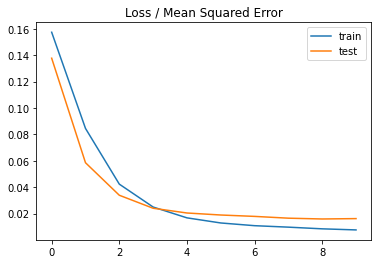

In [ ]:
from matplotlib import pyplot

#evaluate the model
train_mse = model.evaluate(trainX, trainy, verbose=0)
test_mse = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))

# plot loss during training
pyplot.title('Loss / Mean Squared Error')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

# **Binary Classification Loss Functions**

[[-0.63640493 -0.36870191]
 [-0.24465976 -0.73659196]
 [-0.46597138 -1.06687743]
 [-0.70999784 -0.40841948]
 [ 0.70232238 -0.51730147]
 [-0.49776571  0.76955129]
 [-0.31914906 -0.84899624]
 [-0.57839322 -0.49081236]
 [-0.53350227  0.58056527]
 [-0.24733259  0.73011595]
 [ 0.41030774 -0.73075986]
 [ 0.17181003 -0.92504802]
 [ 0.65917045  0.62120588]
 [ 0.87625577  0.12510879]
 [ 0.81946243 -0.01347859]
 [-0.47960986 -0.7880243 ]
 [-0.90187751 -0.70895455]
 [ 0.74827659 -0.55976747]
 [-0.74875324 -0.37153443]
 [ 0.23161178  1.01205842]
 [ 0.81387506  0.22821311]
 [-0.92169575  0.20310719]
 [ 0.74650434 -0.35861224]
 [ 0.01330079  0.68169193]
 [-0.72651409  0.58630948]
 [-0.33930852 -1.0080984 ]
 [ 0.49009938 -0.62509577]
 [-0.9539309  -0.33410313]
 [ 0.6927241  -0.59576417]
 [ 0.003546   -0.9098264 ]
 [-0.35077763  0.82536558]
 [ 0.94798269 -0.14503976]
 [ 0.52327611  0.20621942]
 [ 0.54670705 -0.51026584]
 [ 0.10385825 -0.66844291]
 [ 0.31843503 -0.97937344]
 [ 0.92901189 -0.31993308]
 

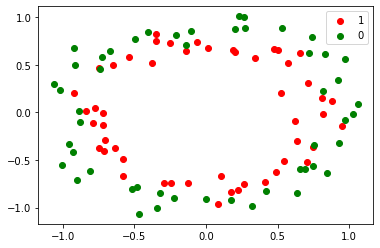

In [15]:
from sklearn.datasets import make_circles
from matplotlib import pyplot

# generate circles
X, y = make_circles(n_samples=100, noise=0.1, random_state=1)
pyplot.scatter(X[:,0][y==1],X[:,1][y==1], c="red", label="1")
pyplot.scatter(X[:,0][y==0],X[:,1][y==0], c="green", label="0")
pyplot.legend()

print(X)
print(y)

In [13]:
# split into train and test
n_train = 5
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

print(trainX)
print(testX)

[[-0.65074176  0.48327057]
 [ 0.27297295 -0.95678467]
 [ 0.09643283  0.72931601]
 [ 0.39483488 -0.94392222]
 [ 0.77076907 -0.14155525]]
[[-0.72043405 -0.52459507]
 [ 0.31304303  0.86074423]
 [-0.62968133  0.48967129]
 [-0.7007385  -0.39249308]
 [ 0.81713385 -0.04428514]]


In [ ]:
# define model
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='sigmoid')) #change activation function and see the effect
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0)

Train: 0.834, Test: 0.846


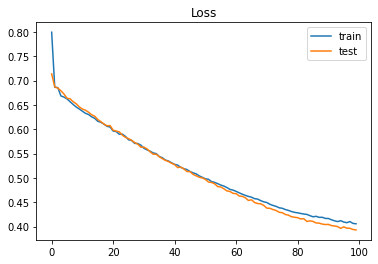

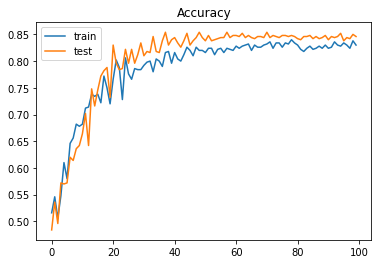

In [ ]:
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot loss during training

pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()
# plot accuracy during training

pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

# **Multi-Class Cross-Entropy Loss**

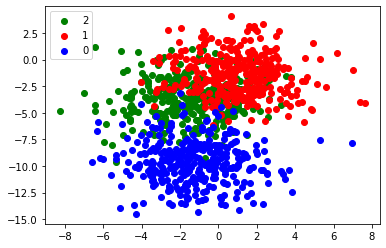

[[  0.48719811  -0.43160548]
 [ -1.48958879  -3.47915742]
 [ -2.06250444  -7.73300419]
 ...
 [ -4.4839941   -3.17623663]
 [ -1.92705839   2.94801349]
 [ -2.32988529 -10.66109273]]
[2 2 2 0 1 0 1 1 2 2 1 0 1 0 0 1 2 2 1 1 2 0 0 2 1 1 2 2 0 1 0 0 1 2 1 0 0
 1 2 0 2 1 1 2 1 0 0 1 1 0 0 2 0 2 2 2 2 0 1 1 2 0 2 0 0 1 0 1 2 0 1 1 1 2
 1 2 1 0 2 2 2 0 1 2 0 1 2 2 1 1 2 0 2 0 0 2 1 0 2 0 2 2 2 1 1 1 1 0 0 2 0
 2 1 2 0 0 0 0 1 2 0 2 0 1 0 2 2 0 2 0 2 0 0 0 1 0 2 1 2 1 2 1 0 1 2 1 0 0
 1 2 1 1 1 0 1 0 1 1 1 1 0 2 2 1 0 1 0 1 1 1 1 2 2 0 2 2 1 2 1 1 2 0 1 2 2
 2 2 1 0 0 0 2 1 1 1 0 2 1 1 2 2 2 2 2 2 2 1 1 0 2 0 1 2 2 0 2 0 1 0 1 1 2
 2 0 2 0 1 0 2 1 2 2 1 2 2 1 2 0 1 2 0 1 2 1 0 0 2 0 1 1 0 1 1 0 1 0 1 1 1
 0 1 1 1 2 2 0 1 0 2 1 1 0 0 2 0 1 0 2 0 0 2 2 2 0 2 0 1 0 2 2 2 1 2 0 1 1
 1 0 2 0 1 0 2 0 0 1 0 1 0 0 2 1 1 2 1 0 0 1 1 1 0 1 1 0 0 2 2 0 0 0 2 0 0
 2 2 2 0 1 1 1 1 0 0 1 2 0 0 2 2 0 2 1 1 0 1 0 1 0 0 0 1 2 2 0 1 2 1 0 0 0
 1 1 0 0 0 2 1 2 2 0 2 0 2 2 2 1 1 0 2 1 2 2 1 0 0 1 0 2 2 1 2 1 0 2 1

In [19]:
# mlp for the blobs multi-class classification problem with cross-entropy loss
from sklearn.datasets import make_blobs
from keras.utils import to_categorical

# generate 2d classification dataset
X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)

#show the dataset
pyplot.scatter(X[:,0][y==2],X[:,1][y==2], c="green", label="2")
pyplot.scatter(X[:,0][y==1],X[:,1][y==1], c="red", label="1")
pyplot.scatter(X[:,0][y==0],X[:,1][y==0], c="blue", label="0")
pyplot.legend()
pyplot.show()

print(X)
print(y)

In [21]:
# one hot encode output variable
y = to_categorical(y)

print(y)
print(len(y))

[[[1. 0.]
  [1. 0.]
  [0. 1.]]

 [[1. 0.]
  [1. 0.]
  [0. 1.]]

 [[1. 0.]
  [1. 0.]
  [0. 1.]]

 ...

 [[1. 0.]
  [1. 0.]
  [0. 1.]]

 [[1. 0.]
  [0. 1.]
  [1. 0.]]

 [[0. 1.]
  [1. 0.]
  [1. 0.]]]
1000


In [ ]:
# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

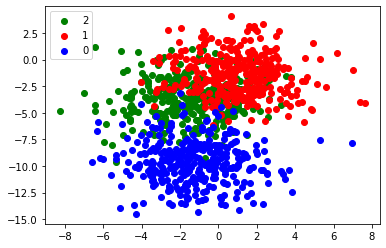

Train: 0.842, Test: 0.816


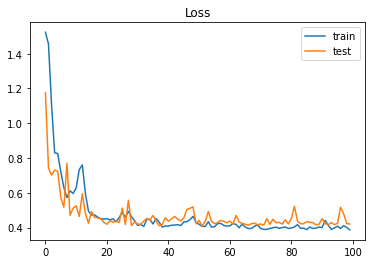

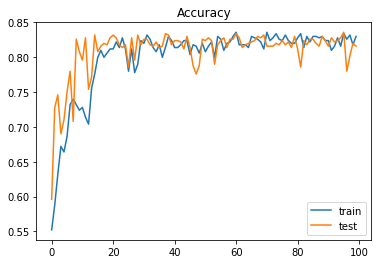

In [ ]:
# define model
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(3, activation='softmax'))

# compile model
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy']) 

# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0)

# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot loss during training

pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

# plot accuracy during training

pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

# **Sparse Multiclass Cross-Entropy Loss**

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Train: 0.832, Test: 0.822


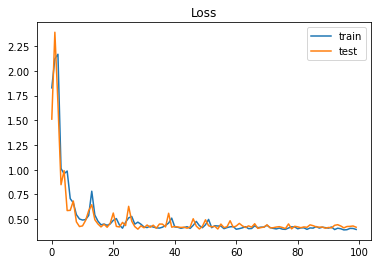

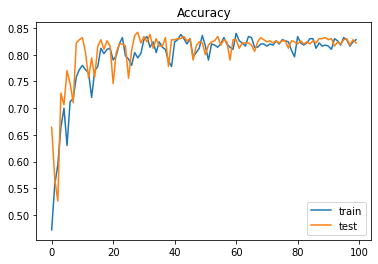

In [ ]:
# generate 2d classification dataset
X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)

# without one hot encoding

# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(3, activation='softmax'))
# compile model
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0)
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot loss during training

pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

# plot accuracy during training
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:
#credit: https://machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/